In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
from custom_causal_inference import CustomCausalInference
import utils
import forward_models_causal_inference
import matplotlib.pyplot as plt
import pickle

In [2]:
%reload_ext autoreload

In [3]:
D = 250  # grid dimension 
angle_gam_data_path = './base_bayesian_contour_1_circular_gam.pkl'
unif_fn_data_path='./uniform_model_base_inv_kappa_free.pkl'
p_commons = [0, .2, .5, .7, 1]

causal_inference_estimator = forward_models_causal_inference.CausalEstimator(
    model=CustomCausalInference(decision_rule='mean'),
    angle_gam_data_path=angle_gam_data_path,
    unif_fn_data_path=unif_fn_data_path)
unif_map = causal_inference_estimator.unif_map

In [4]:
with open('./learned_data/optimal_kappa_pairs.pkl', 'rb') as f:
    optimal_kappa_pairs = pickle.load(f)
with open('./learned_data/min_error_for_idx_pc.pkl', 'rb') as f:
    min_error_for_idx_pc = pickle.load(f)
with open('./learned_data/min_error_for_idx.pkl', 'rb') as f:
    min_error_for_idx = pickle.load(f)
s_ns = np.load('./learned_data/selected_s_n.npy')
ts = np.load('./learned_data/selected_t.npy')
r_ns = np.load('./learned_data/selected_r_n.npy')

In [8]:
grid_dim = 5

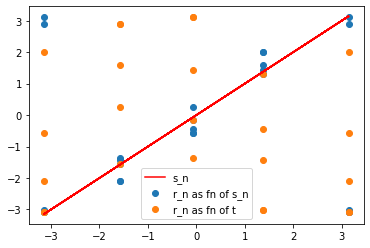

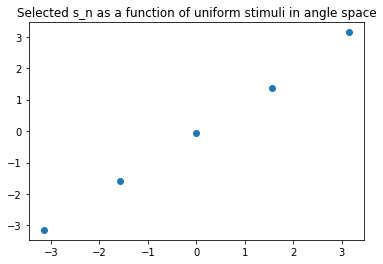

In [9]:
plt.scatter(s_ns, r_ns, label = 'r_n as fn of s_n')
plt.scatter(ts, r_ns, label='r_n as fn of t')
plt.plot(s_ns, s_ns, label='s_n', c='r')
plt.legend()
plt.show()
plt.scatter(np.linspace(-np.pi, np.pi, num=grid_dim), s_ns[:grid_dim])
plt.title('Selected s_n as a function of uniform stimuli in angle space')
plt.show()

In [31]:
err_mat = np.zeros_like(s_ns)
for key in min_error_for_idx_pc:
    if min_error_for_idx_pc[key] == min_error_for_idx[key[0]]:
        err_mat[int(key[0])] = min_error_for_idx[key[0]]
        print(f'{key[0]}: t, s_n, r_n = {np.round(s_ns[key[0]], 3), np.round(ts[key[0]], 3), np.round(r_ns[key[0]], 4)}, d/pi={np.round(utils.circular_dist(s_ns[key[0]], ts[key[0]]) / np.pi, 4)}, min_err={min_error_for_idx_pc[key]},  p_c={np.round(key[1], 3)}, optimal_kappa={optimal_kappa_pairs[key]}')


0: t, s_n, r_n = (-3.142, -3.142, -3.0871), d/pi=0.0, min_err=[8.66707998e-06],  p_c=0.333, optimal_kappa=(array([52.47613189]), array([3.61461779]))
1: t, s_n, r_n = (-1.577, -3.142, -2.0826), d/pi=0.498, min_err=[1.7566535e-05],  p_c=0.778, optimal_kappa=(array([1.70776171]), array([2.57301589]))
2: t, s_n, r_n = (-0.063, -3.142, -0.5793), d/pi=0.9799, min_err=[0.00041967],  p_c=1.0, optimal_kappa=(array([2.62040905]), array([2.57301589]))
3: t, s_n, r_n = (1.375, -3.142, 1.9934), d/pi=0.5622, min_err=[5.85283349e-05],  p_c=1.0, optimal_kappa=(array([2.00518965]), array([3.82530176]))
4: t, s_n, r_n = (3.142, -3.142, -3.0871), d/pi=0.0, min_err=[2.9672376e-06],  p_c=0.222, optimal_kappa=(array([179.69853694]), array([18.68781944]))
5: t, s_n, r_n = (-3.142, -1.577, 2.8814), d/pi=0.498, min_err=[1.84024102e-05],  p_c=0.333, optimal_kappa=(array([27.60889901]), array([1.30377498]))
6: t, s_n, r_n = (-1.577, -1.577, -1.5644), d/pi=0.0, min_err=[2.15324186e-07],  p_c=0.222, optimal_kappa

C:\Users\Ana\AppData\Local\Temp/ipykernel_8768/3194479584.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  err_mat[int(key[0])] = min_error_for_idx[key[0]]


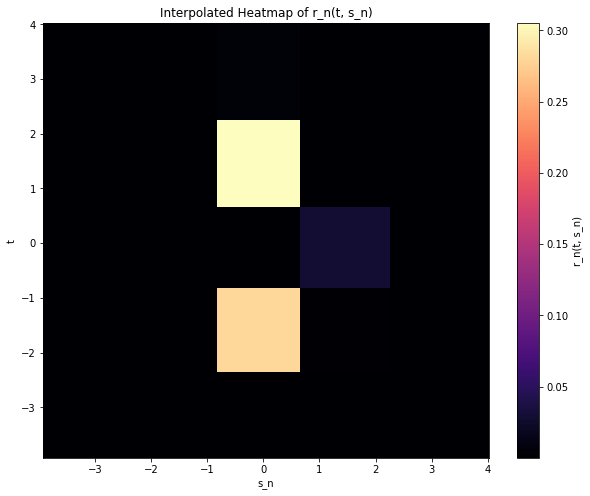

In [28]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(s_ns.reshape((grid_dim, grid_dim)), ts.reshape((grid_dim, grid_dim)), 
               err_mat.reshape((grid_dim, grid_dim)), shading='auto', cmap='magma')
plt.colorbar(label='r_n(t, s_n)')
plt.xlabel('s_n')
plt.ylabel('t')
plt.title('Interpolated Heatmap of r_n(t, s_n)')
plt.show()